# Min Cut Lab
**Objectives:**
- qqq
    - qqq
    - qqq

## Project Selection Problem
Here we provide a walkthrough of the Tool Selection problem (sometimes known as the Tool Selection problem), which we will then cleverly reduce to a min-cut instance where the cut defines the optimal set of projects we want to select. This problem is often used to help companies determine which projects they should take on in order to maximize their total profit given that they know the costs and rewards of completing each project, and there are overlapping costs between some of the projects.

The problem is as follows: suppose you have a set of projects $p_1, p_2, ..., p_n$ and a set of tools $t_1, t_2, ..., t_m$. Each project $p_i$ has with it an associated reward/benefit for completing it $b_i$ and a set of tools that it depends on in order to be completed $D_i$. Each tool $t_j$ has an associated cost for acquiring it $c_j$, but once acquired, can be used an infinite amount of times. We can imagine the tools, for example, to be various software that we need to purchase licenses for to be used in certain projects. Let's denote the set of projects we end up taking as $P$ and the set of tools we buy as $T$.

The goal here is that we want to maximize the profit that we earn. That is, we want to maximize the total benefit we get from the projects we take minus the total cost we have to endure in order to do those projects. Here's what that looks like if we turn it into an objective function: *maximize* $\sum_{p_i \in P}^{} b_i - \sum_{t_i \in T}^{} c_i$

Upon first glance, you might think "well, this is a maximization problem so if I were to turn it into some instance of a network flow problem, I would probably try max flow first." Take a moment to think about how you might model that... tricky right? Unfortunately for us, even though the objective function the problem defines for us seems to neatly fit into a max-flow model, there actually isn't any immediately clear way to model it in that way. So, we need to make a clever change to our objective function to expand the options we have for modeling this problem, and we'll do so by turning it into a minimization function.

**Q:** Rewrite *maximize* $\sum_{p_i \in P}^{} b_i - \sum_{t_i \in T}^{} c_i$ as a minimization function.

**A:** <font color='blue'> *minimize* $-\sum_{p_i \in P}^{} b_i + \sum_{t_i \in T}^{} c_i$ </font>

If we denote the entire set of potential projects as $S$ and the set of projects we don't choose as $\overline{P}$, we can write an equation for the total benefit of taking all the projects as a sum of the benefits of projects we take and projects we do not take.

**Q:** Write an equation for $\sum_{p_i \in S}^{} b_i$ using summations over $p_i \in P$ and $p_i \in \overline{P}$.

**A:** <font color='blue'> $\sum_{p_i \in S}^{} b_i = \sum_{p_i \in P}^{} b_i + \sum_{p_i \in \overline{P}}^{} b_i$ </font>

**Q:** Now replace the term $\sum_{p_i \in P}^{} b_i$ in the minimization function using the equation you just wrote in the previous question. (You'll most likely have to shift some terms around)

**A:** <font color='blue'> *minimize* $-\sum_{p_i \in S}^{} b_i - \sum_{p_i \in \overline{P}}^{} b_i + \sum_{t_i \in T}^{} c_i$ 
 (because $\sum_{p_i \in P}^{} b_i = \sum_{p_i \in S}^{} b_i - \sum_{p_i \in \overline{P}}^{} b_i$) </font>

You should have gotten a function in terms of sums over $S$, $\overline{P}$, and $T$. In particular, there should be the term  $\sum_{p_i \in S}^{} b_i$. Note that because this is a constant, it will affect our objective function the same way in any solution we find, so we can remove it from our objective function completely without changing the optimality of our solution.

**Q:** Rewrite the objective function with the constant term removed. Hint: it should be contain two summations.

**A:** <font color='blue'> *minimize* $\sum_{p_i \in \overline{P}}^{} b_i + \sum_{t_i \in T}^{} c_i$ </font>

**Q:** Write out in English the meaning behind the function you got in the previous question.

**A:** <font color='blue'> minimize the sum of benefits from projects we do not take on plus the sum of the costs of tools we buy </font>

How can we interpret this new objective function? We can think of it as minimizing the opportunity cost of projects we don't take on, that is the benefit we are giving up by choosing not to complete a certain project, along with the cost of buying tools to complete the projects we do choose. Hopefully, at this point you can see how this helps us acheive our original goal of maximizing profit.

Now, it's starting to look more intuitive that we might be able to produce a min-cut instance from this problem, so let's start walking through how we might go about our model. In a normal min-cut instance, we have capacities on every edge and the capacities of edges leaving the cut we choose contribute to the objective function value (which as a reminder was *minimize* $\sum_{i \in S, j \in T}^{} c_{i,j}$).

**Q:** Based on the parallels between objective functions, what do you think we should use for the capacities of edges in our network flow graph?

**A:** <font color='blue'> the benefits of projects and the costs of tools </font>

Now let's start to put our network flow graph together. Hopefully in the previous question, you wrote something that assigns capacities depending on whether we're looking at a project or a tool. This suggests that in our network, we want to at least have a node for each project and each tool (along with a source and a sink which we'll add toward the end). Let's use that idea and experiment with the different ways we can add edges and corresponding capacities.

Let's first look at assigning those capacities to outgoing edges of both project and tool nodes. Remember that only edges leaving the cut, starting inside and ending outside, contribute to the capacity of the cut. Also, let's remind ourselves that our goal is for projects and tools we use to be inside the s-side of the cut.

Suppose we have the following projects and tools:

| Project     | Benefit      |
| ----------- | -----------  |
| 1           | 2            |
| 2           | 3            |


| Tool        | Cost         |
| ----------- | -----------  |
| A           | 1            |
| B           | 4            |
| C           | 5            |


Consider the following cut:

![](images-lab/tool-selection-images/outgoing_edges_cut.png)

**Q:** What edges contribute to the capacity of the cut? Hint: the capacity of the cut should add up to 4

**A:** <font color='blue'> edges leaving project 2 and tool A </font>

**Q:** Which tool(s) do we use? Do their costs contribute to the cut capacity?

**A:** <font color='blue'> tool A, yes </font>

**Q:** Which project(s) do we not take? Do their benefits contribute to the cut capacity?

**A:** <font color='blue'> project 1, no </font>

**Q:** In this case, the benefits of projects we take are adding to the capacity of the cut, a value that we are trying to minimize. Using the plain English definition of the objective function you wrote earlier, explain why this model doesn't quite work out.

**A:** <font color='blue'> Right now although we are correctly incorporating the costs of tools we use to be included in the capacity of the cut, we are including the benefits of projects we take rather than the benefits of projects we do NOT take. </font>

So this model of our network uses the cost of tools like we wanted (costs of tools we use contribute to the cut capacity) but also adds the benefits of projects we take to the cut capacity. What does this mean? Considering our objective function is a minimization function, this means that technically, we would be trying to minimize the benefits of projects we take, which is the opposite of what we want! Okay, so it looks like assigning costs of tools to outgoing edges worked out well, but we probably shouldn't be assigning benefits to outgoing edges. Let's try assigning benefits to the incoming edges of project nodes instead.

Consider the following cut:

![](images-lab/tool-selection-images/in_outgoing_edges_cut.png)

**Q:** What edges contribute to the capacity of the cut? Hint: the capacity of the cut should add up to 3

**A:** <font color='blue'> edge into project 1 and edge leaving tool A </font>

**Q:** Which project(s) do we not take? Do their benefits contribute to the cut capacity?

**A:** <font color='blue'> project 1, yes </font>

Great! If you interpreted the cut correctly, you'll have found that this assignment of edge capacities uses the costs of tools we need and benefits of projects we don't take exactly as we wanted from our objective function. Here, projects and tools we use are inside the cut, and the capacity of the cut reflects benefits of projects we left out (essentially opportunity costs of not taking on a project) and costs of tools we needed to use. 

Since all the projects now have incoming edges, it seems likely these incoming edges could all originate from the same source and since all the tool nodes now have outgoing edges, it's likely they could all end at the same sink node. Another point of intuition is that since the source is always on the s-side of the cut, by having the source connect to each project node, if a project is not in the cut, then we know its connecting edge from $s$ will contribute to the cut capacity. Similarly, since the sink node is always not in the cut, if we use any tool, its connecting edge to $t$ will contribute as well. Let's visualize the network so far after adding $s$ and $t$:

![](images-lab/tool-selection-images/incomplete_graph.png)

It looks somewhat similar to our bipartite matching graph since we can divide the project and tool nodes quite well, but there is a bit more going on here. Let's focus on how to tie the network together with edges between project and tool nodes. We need some way to encode the dependencies between projects and the tools they require. In the min-cut model, this means that if project 1 depends on tools A and B, we need a way to ensure that if we include project 1 in the cut, we must also include tools A and B; they cannot be on opposite sides of the cut. A clever way to encode this is using infinite-capacity edges, a very powerful modeling tool. Here, since we want some relationship between projects and tools, we'll have these edges be between the two layers of nodes.

**Q:** You might be concerned that if we choose the cut such that an $\infty$ capacity edge crosses the cut, we'll have a cut capacity of $\infty$ which, in almost all cases, is certainly not the minimum. But let's say that we can guarantee that there always exists a finite capacity cut. Why do we not have to worry about $\infty$ capacity edges crosssing the minimum cut our algorithm yields?

**A:** <font color='blue'> Because if there was a finite capacity cut, our algorithm would always return that over the cut where a $\inf$ capacity edge crosses the cut as this would cause the cut to have $\infty$ capacity which is greater than any finite value. </font>

Now, we have to determine the direction of these infinite-capacity edges. Let's just look at our project and tool nodes in isolation. Suppose we have the following dependencies: 

| Project     | Tools Needed |
| ----------- | -----------  |
| 1           | A, B         |
| 2           | B, C         |

Let's say we orient our edges this way:

![](images-lab/tool-selection-images/wrong_direction.png)

**Q:** Based on this network, fill in the blank: *If we take tool B then we must take project(s) ___ .*

**A:** <font color='blue'> 1 and 2 </font>

**Q:** Explain why this setup doesn't encode the depemdencies as we intended.

**A:** <font color='blue'> This setup encodes dependencies as if tools are dependent on the projects we take. Actually, we could realistically buy a tool and never use it for any project, but this encoding says if we buy a tool we must take on all projects that use it. In addition, it doesn't require us to buy all tools required for a project in order to take on that project. </font>

So that direction of infinite-capacity edges didn't work out. Let's try the other direction:

![](images-lab/tool-selection-images/right_direction.png)

**Q:** Based on this network, fill in the blank: *If we take project 2 then we must take tool(s) ___ .*

**A:** <font color='blue'> B and C </font>

Eureka! We've found the correct encoding! Now, we just need to make sure there always exists a cut of infinite capacity in our network. Well, let's take a look at the complete graph of the model we just outlined:

![](images-lab/tool-selection-images/complete_graph.png)

**Q:** Identify a cut of finite capacity (write the nodes on the s-side of the cut).

**A:** <font color='blue'> {$s$}, all nodes except $t$, etc. </font>

Certainly, we can also see that with this outline of generating our graph, we'll always have a finite capacity cut of just {s}. So, we are guaranteed that our infinite-capacity edges won't disturb the intended significance of our cut.

And that's it! We've just successfully reduced the tool selection problem to a min-cut instance and introduced a new technique involving infinite-capacity edges. To recap, here's what we did:

- we are given:
    - a set of projects, each project denoted $p_i$ with an associated benefit of completing it $b_i$
    - a set of tools, each tool denoted $t_j$ with an associated cost of buying it $c_j$
    - for each project $p_i$, a set of tools $D_i$ that it needs in order to complete it
- we want:
    - to maximize our profit (translated to minimizing our loss)
    - a set of projects to complete
    - a set of tools to buy
- objective function: minimize the forgone benefit (opportunity cost) of projects we don't do plus the cost of tools we buy 
    - *minimize* $\sum_{p_i \in \overline{P}}^{} b_i + \sum_{t_i \in T}^{} c_i$
- our graph has nodes: $s$, project nodes, tool nodes, $t$
    - we have an edge from the source to every project node $p_i$ with capacity $b_i$
    - we have an edge from every tool node $t_i$ to the sink with capacity $c_i$
    - we have an edge from a project node $p_i$ to a tool node $t_j$ with $\infty$ capacity if project $p_i$ needs tool $t_i$, (equivalently if $t_j \in D_i$)

Let's go through a complete formulation. Suppose you are given the following set of projects, tools, and dependencies:

| Project     | Benefit      |
| ----------- | -----------  |
| 1           | 6            |
| 2           | 9            |
| 3           | 7            |

| Tool        | Cost         |
| ----------- | -----------  |
| A           | 8            |
| B           | 2            |
| C           | 3            |
| D           | 5            |

| Project     | Tools Needed |
| ----------- | -----------  |
| 1           | A            |
| 2           | A, B         |
| 3           | C, D         |

**Q:** Draw the network for the min-cut instance of this problem.

**A:** ![](images-key/example_graph.png)

**Q:** This network should be simple enough to be able to find the min-cut by hand. By inspection or using any tools you have learned in the past, write the projects and tools you end up choosing. (Check: there should be 2 projects and two tools)

**A:** <font color='blue'> projects 1 and 2, tools A and B ![](images-key/example_graph_cut.png) </font>

We have now successfully turned the Project Selection Problem into a minimum cut problem! We already know how to solve a minimum cut problem, so now we also know how to solve a Project Selection Problem. Let's now put this into practice.

## Recipe Application

There are countless applications of the Project Selection Problem. In this section, we will walk through an example related to choosing dishes.

You are in charge this year of making your family's Thanksgiving dinner! But you are stuck on what dishes to make. You would like to choose the dishes that your famliy will like best, but at the same time you don't want to spend too much on ingredients. Fortunately, you can use the Project Selection Problem to help with your decision.

#### Setting Up a Project Selection Problem

Say that you have a set of Thanksgiving dishes that you know how to make, and dish has a recipe requiring particular ingredients. Think of how you would be able to model your problem of choosing what to make for Thanksgiving as a Project Selection Problem.

**Q:** In this application of the project selection problem, what should you consider to be the "tools" and what should you consider to be the "projects?"


**A:** <font color='blue'> The ingredients are the tools and the dishes/recipes are the projects.

Let's make your dish selection problem a bit more concrete. Below are the dishes you are considering to make for dinner, together with a score of how much benefit you get from making the dish.
* Mashed potatoes: 3 <font color='grey'> <font size=2> $~~~$ (Mashed potatoes are good, but not stellar)
* Roasted vegetables: 6 <font color='grey'> <font size=2> $~~~$ (One of your favorite foods!)
* Stuffing: 2 <font color='grey'> <font size=2> $~~~$ (Your brother hates stuffing)
* Butternut squash soup: 5 <font color='grey'> <font size=2> $~~~$ (You're personally not a roasted veggies fan, but it's one of your aunt's favorite foods)
* Turkey: 15 <font color='grey'> <font size=2> $~~~$ (It would be a shame not to have turkey on thanksgiving)

**Q:** What do these values represent in terms of the general form of the Project Selection Problem?


**A:** <font color='blue'> The benefit values $b_i$ of the projects.

Each dish has the following ingredients
* Mashed potatoes: Potatoes, milk, butter.
* Roaster vegetables: Butternut squash, carrots, rosemary
* Stuffing: Bread, butter, rosemary
* Soup: Squash, milk
* Turkey: just turkey

And each ingredient has the following cost.
* Potatoes: 4
* Milk: 2
* Butter: 2
* Butternut squash: 4
* Carrots: 3
* Rosemary: 2
* Bread: 4
* Turkey: 10

**Q:** What do these values represent in terms of the general form of the Project Selection Problem?


**A:** <font color='blue'> The costs $c_i$ of the tools.

Now, let's think about out objective.

**Q:** In English, what are we trying to minimize in our dish problem?


**A:** <font color='blue'> The total cost of the ingredients used by the dishes chosen minus the total benefit of the dishes chosen.

**Q:** If we select turkey and soup as our dishes, what would be our objective value?


**A:** <font color='blue'> cost of turkey + cost of butternut squash + cost of milk - benefit of turkey - benefit of soup = 10 + 4 + 2 - 15 - 5 = -4

Before we have succesfully modeled our dish dilemma as a Project Selection Problem, we first need to address a couple assumptions that need to be made.
* In the Project Selection Problem, once a tool is acquired, it can be used again and again without constraint. However, ingredients may not be able to be used repeatedly because the ingredient might run out. Assume that the ingredients always come in large packaging, so that once you buy an ingredient there is plenty of it to make any combination of dishes.
* The benefit values of each dish are simply made up. When applying the Project Selection Problem, there is not always a perfect way to quantify the cost of the tools or the benefit from the projects. Assigning quantitative values to qualitative benefits or costs can be tricky, but when done so strategically can still yield trustworthy results. We will assume that the values for each dish effectively capture the benefit of making the dish.

#### Reducing to a Minimum Cut

Now we that we have modeled our Thanksgiving dish problem as a Project Selection Problem, we will solve the Project Selection Problem by reducing it as a Minimum Cut Problem, just as you did in the first part of this lab. Remember that the fitst step is to create a graph for which finding a minimum cut is analogous to selecting the best combination of projects.

**Q:** Draw the graph for which finding the minimum cut is analogous to slecting the best combination of projects. Remember to label your nodes.


**A:** <font color='blue'> <font color='red'> __Draw the solution__



**Q:** Draw an s-t cut which would indicate the selection of mashed potatoes and soup as our dishes.

**A:** <font color='red'> __Show the cut which includes the mashed potatoes node, the soup node, the potatoes node, the butter node, the milk node, and the squash node__ 

All we need to do now is find the minimum cut in this graph. We will do so using Python. Run the code below and look at the minimum cut at the end of the cell.

In [9]:
import networkx as nx

In [2]:
recipes = {
    'Mashed potatoes': ['Potatoes', 'milk', 'butter'],
    'Roasted vegetables': ['Butternut squash', 'Carrots', 'Rosemary'],
    'Stuffing': ['Bread', 'Butter', 'Rosemary'],
    'Butternut squash soup': ['Butternut squash', 'Milk'],
    'Turkey (dish)': ['Turkey (ingredient)']
}

benefits = {
    'Mashed potatoes': 3,
    'Roasted vegetables': 6,
    'Stuffing': 2,
    'Butternut squash soup': 5,
    'Turkey (dish)': 15
}

costs = {
    'Potatoes': 4,
    'Milk': 2,
    'Butter': 2,
    'Butternut squash': 4,
    'Carrots': 3,
    'Rosemary': 2,
    'Bread': 4,
    'Turkey (ingredient)': 10,
}


dishes = list(benefits.keys())
ingredients = list(costs.keys())
                   
g = nx.DiGraph()

for ingredient in ingredients:
    g.add_node(ingredient)
    g.add_edge(ingredient, 't', capacity=costs[ingredient])

for dish in dishes:
    g.add_node(dish)
    g.add_edge('s', dish, capacity=benefits[dish])
    for ingredient in recipes[dish]:
        g.add_edge(dish, ingredient, capacity=float('inf'))

cut = nx.algorithms.flow.minimum_cut(g, 's', 't')[1][0]
cut

{'Butternut squash',
 'Butternut squash soup',
 'Carrots',
 'Milk',
 'Roasted vegetables',
 'Rosemary',
 'Turkey (dish)',
 'Turkey (ingredient)',
 'butter',
 'milk',
 's'}

In order to help you answer the next questions, draw the cut produced by the cell on the graph you drew earlier.

**Q:** Looking at the cut, what dishes should you make?


**A:** <font color='blue'> Butternut squash soup, roasted vegetables, and turkey.

**Q:** What is the total cost of the ingredients needed to make roasted vegetables? What is the benefit you get from making roasted vegetables?


**A:** <font color='blue'> The total cost of the ingredients needed to make roasted vegetables is the cost of butternut squash (4) plus the cost of carrots (3) plus the cost of rosemary (2) which equals 9. The benefit from having roasted vegetables is 6.

**Q:** Hmmm. You should have found that the benefit of having roasted vegetables is lower than the total cost of its ingredients. Why do we still choose to make roasted vegetables? (hint: what are the ingredients of the soup?)


**A:** <font color='blue'> We can also use the butternut squash to make soup! We would not benefit from making roasted vegetables or soup individually, but because they both require buternut squash, the cost of the butternut squash gets "shared" across the two dishes.

**Q:** Roasted vegetables is an example of a dish that is selected despite its benefit being lower than the total cost of its ingredients. Could it ever be the case that a dish whose benefit is higher than the total cost of its ingredients is not selected? Explain your reasoning.


**A:** <font color='blue'> No. if the benefit is higher than the total cost of the ingredients, then you make a profit from making that dish regardless of what other dishes you make.

#### Scaling up

Using a minimum cut to solve the Thanksgiving problem above seems like overkill for such a small problem. But what if you have dozens of recipes and ingredients?

## The Secret Tie (Third attempt)

In the Project Selection Problem, it is possible for there to be a tie; there may be multiple different combinations of projects that lead to the same optimal profit (or whatever the objective value is, which is not always monetary profit).

As long as one of these tied sets is not a subset of the other, then there are not one but two other combinations of projects that also lead to the same optimal profit.

In this section of the lab, we will explore these secret ties and show why they exist.

<font color='red'> __Add image of graph. Also maybe add a question to remind people of what the capacity of a cut is?__

Take this small graph. Each of the two cuts shown are minimal.


**Q:** What is the capacity of either of the cuts?

**A:** <font color='blue'> The profit from each of the combination of projects

**Q:** What is the capacity of the intersection of the two min cuts?
    
**A:** <font color='blue'> Five
    
**Q:** What is the capacity of the union of the two min cuts?
    
**A:** <font color='blue'> Five
    
Huh. This is interesting! Let's see if this is true for all instance of the project selection problem in general.

Let's start with an arbitrary project selection problem with two distinct known optimal combinations of projects.

Choose one of the optimal sets of projects, and take all the projects that are part of that optimal set but not of the other optimal set. We'll call this the "additional" set of projects. _Draw a venn diagram and mark the cuts and the two additional set, you could also have an example graph_. Not that there are two different additional sets, but we will just choose an arbitrary one.

Each of the additional set of projects also requires a set of tools. However, some of those tools may already be necessary for one of the projects in the optimal set that the projects in the additional set are not a part of. We will refer to the tools that are needed for a project in the additional set but are not already required by a project in the other optimal set as additional tools.

**Q:** In the graph below, choose one of the two additional sets. What are the projects in the additional set? What are the additional tools?

We will first show that in the case of a tie between two optimal sets, the total benefit of the additional projects is equal to the total cost of the additional tools.

Instead of directly showing that the above statement is true, we will show that a contradiction happens if we assume that the statement is not true. This is a very common technique called a _proof by contradiction_.

So for the sake of contradiction, let's assume that the total benefit from the additional projects _is not_ equal to the total cost of the additional tools. This either means that the total benefit of the additional projects is greater than the total cost of the additional tools, or that the total benefit of the additional projects is less than the total cost of the additional tools. We will now show that in either case, a contradiction happens.

1. In this case that the total benefit of the additional projects is greater than the total cost of the additional tools, adding the additional projects to the the other optimal set will improve the profit. This is the same as taking the union of both optimal sets. But wait a minute, if the union of the two optimal sets results in a set with a higher profit than the optimal sets, than the optimal sets are not optimal at all! We have found a contradiction.

2. Now we are going to let you handle the second case!
  - **Q:** Show that there exists a contradiction if the total benefit of the additional projects were less than total cost of the additional tools
  - **A:** <font color='blue'>Total benefit of the additional projects is less than total cost of the additional tools: In this case, the profit of the optimal set which includes the additional set can be improved by getting rid of the additional projects. Thus, the intersection of the two optimal sets has a higher profit than one of the optimal sets. As in the first case, we have found a contradiction by showing that the optimal sets aren't actually optimal because there is another set with a higher profit.

Because we found a contradiction in both cases, it must be the case the the total benefit from the additional projects _is_ equal to the total cost of the additional tools. This result means that including an additional set or not does not actually change the profit. Thus, the intersection or the union of two optimal sets will have the same profit.

And we're done! We have shown that if you have at least two optimal sets of projects, then the intersection and the union of those sets will also be optimal.

__Is this proof useful?__

Is this result useful? In some ways, it is not. In theory, all the benefit and cost values should perfectly capture the real-world costs and benefits. However, as mentioned earlier, in practice it may be a challenge to come up with quantitative values for more qualitative costs or benefits. There may be minor factors that are complicated to quantify, but because they have little influence it is not worth the effort to incorporate them in the model. In these type of cases, looking for ties and using the minor qualitative factors may prove useful.

There might also be dependencies in the costs. For example, how do you desincentivize choosing a large number of projects. These are costs that don't apply to the number of projects, but not to any project in particular, so it cannot be captured in the individual benefit values.

It is these dependencies that are the main shortcoming to the Project Selection Problem. For example, what if you have a coupon that you can use on a vegetable (either squash or carrots), but you only have one coupon. You can't just decrease the cost of the carrots and decrease the cost of the squash.

# Draft (ignore everything below)

## The Secret Tie (second attempt)

In the Project Selection Problem, it is possible for there to be a tie; there may be multiple different combinations of projects that have the same optimal objective value.

In terms of the minimum cost flow formulation of the Project Selection Problem, a graph may have multiple minimum cuts. Take the graph below as an example. Both cuts are minimum cuts. They both have the same capacity and there is no other cut in the graph with a capacity smaller than these two.

<font color='red'> __Show graph__

The intersection of these two minimum cuts has an interesting property that we will explore in this section of the lab.

**Q:** What nodes are part of the intersection of the two minimum cuts?

**A:** <font color='red'> __Answer__

If you have two optimal combinations of projects, then the intersection of of the projects is also an optimal. For example, if it is optimal to either make stuffing and soup, and you reach the same objective by making soup and turkey, then just making soup will yield the same objective as well. Kind of cool! This means that if you have a tie between two combinations of projects for which one is not just a subset of the other, then there is always a secret third tie!

Let's now try to understand why.

Take an arbitrary flow graph derived from a Project Selection Problem.

Remember that the characteristics of such a graph is that is 
* Has a source node.
* Has a sink node.
* Has two layers in between the source and sink node.
* There is an edge with positive capacity between the source and every node in the first layer (the project)


Does not apply to all graphs in general. It works in the case of the project selection problem because there are no edges going from a node that is exclusively in one min cut to a node that is exclusively in the other.

## The secret tie (first attempt)

In the Project Selection Problem, it is possible for there to be a tie; there may be multiple different combinations of projects that have the same optimal objective value.

In terms of the minimum cost flow formulation of the Project Selection Problem, a graph may have multiple minimum cuts. Take the graph below as an example. Both cuts are minimum cuts. They both have the same capacity and there is no other cut in the graph with a capacity smaller than these two.

<font color='red'> __Show graph__

The intersection of these two minimum cuts has an interesting property that we will explore in this section of the lab.

**Q:** What nodes are part of the intersection of the two minimum cuts?

**A:** <font color='red'> __Answer__

Take an arbitrary graph with a known minimum cut.

Notice how we usually represent a cut by drawing a closed loop around a set of nodes. We will present this arbitrary graph with a minimum cut by drawing just the cut.

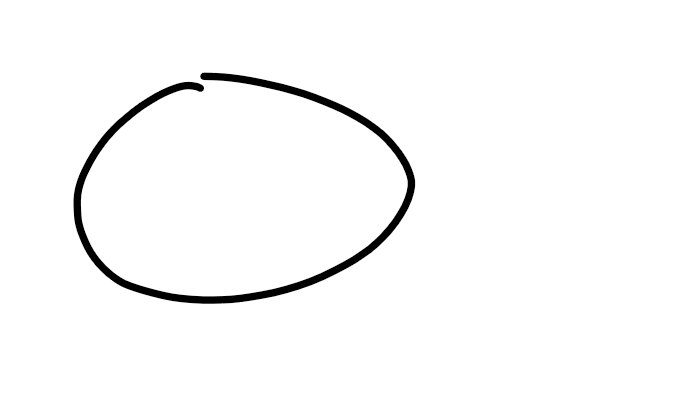

Why don't we draw any nodes and edges? That is because we are not drawing any particular graph, but an arbitrary graph whose only property we care about now is that is has a cut. We do not care about what the nodes are, we only care about the fact that a node can be either inside the cut or outside the cut.

Now say that this graph has a second minimum cut. We draw the second cut as a loop as well.

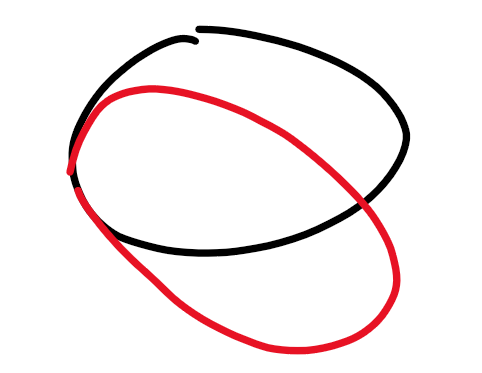

#### Full proof

The two cuts define four distinct sets of nodes. A node can either be exclusively in the first min cut, exclusively in the second min cut, in both min cuts, or in neither min cut.

Let's give names to each of these sets. Let's call the set of all nodes that are exclusively in the first cut $A$, the set of all nodes that are exclusively in the second cut $B$, the set of all nodes that are in both cuts $C$, and the set of all nodes in neither cuts as $D$

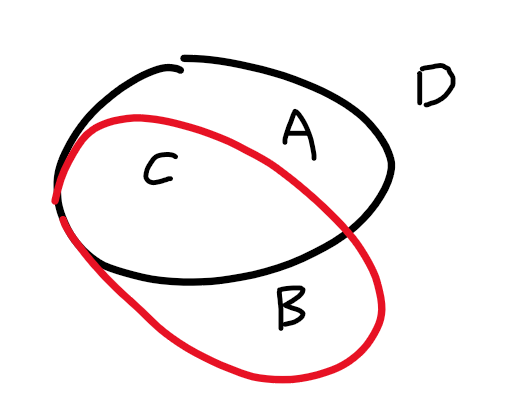

We will prove that the intersection of the two minimum cuts, $C$, is actually a minimum cut of itself!



Now, let us remember an important definition.

**Q:** What is the capacity of a cut?

**A:** <font color='blue'> The sum of the capacities of all the edges leaving the cut.

Thus, the capacity of a cut is completely determined by the edges leaving a cut. We will now take a closer look at edges going out each of our four node sets to better understand the capacity of the node sets.
    
Say you have an edge that originates in A, the edge must end either in $A$, $B$, $C$, or $D$ (anywhere in the graph). Let's refer to the set of all edges going from a node in $A$ to a node in $D$ as $E_{AD}$.
    
Thus, the set of all edges with a starting end in $A$ is equal to $E_{AA} \cup E_{AB} \cup E_{AC} \cup E_{AD}$.
    
**Q:** Which of the four edge sets above contribute to the capacity of A?
    
**A:** <font color='blue'> $E_{AB}$, $E_{AC}$, and $E_{AD}$ contribute to the cut, but $E_{AA}$ does not because these edges don't leave A.
    
    
**Q:** In a similar way, write down what edges contribute to the capacity of the original cut.
    
**A:** <font color='blue'> $E_{AB}$, $E_{AD}$, $E_{CB}$, and $E_{CD}$.


Now that we have our sets of nodes and our sets of edges defined, let us get started on a proof.

We were already give two minium cuts ($A \cup C$ and $B \cup C$). Our theorem of the secret tie claims that $C$ is a third minimum cut.

Instead of showing directly that $C$ is a minimum cut, we are going to show that something impossible happens if $C$ were not a minimum cut. This strategy of proving something by showing that the opposite is impossible is called a proof by contradiction.

For the sake of contradiction, now let's assume that $C$ is not a minimum cut. This means that the capacity of $C$ must be greater than the capacity of $B \cup C$.

Let us represent the sum of the capacities of all the edges in the edge set $E_{AB}$ for example as $cap(E_{AB})$

Therefore, the capacity of $C$ is equal to $cap(E_{CA})+cap(E_{CB})+cap(E_{CD})$, and the capacity of $B \cup C$ is equal to $cap(E_{CA})+cap(E_{CD})+cap(E_{BA})+cap(E_{BD})$.

Because we assume that $C$ is not a minimum cut, we assume that
$cap(E_{CA})+cap(E_{CD})+cap(E_{BA})+cap(E_{BD}) \leq cap(E_{CA})+cap(E_{CB})+cap(E_{CD})$

**Q:** Reduce this inequality by subtracting some terms from both sides. What new equivalent inequality do you get?

**A:** <font color='blue'> $cap(E_{BA})+cap(E_{BD}) \leq cap(E_{CB})$
    
    
We want to eventually show that The capacity of $A \cup B \cup C$ is less than the capacity of any of the original cuts, let's say $A \cup C$. This can be expressed as $cap(E_{AD})+cap(E_{BD})+cap(E_{CD}) \leq cap(E_{AD})+cap(E_{AB})+cap(E_{CD})+cap(E_{CB})$. Subtracting common terms from both sides, we get $cap(E_{BD}) \leq cap(E_{AB})+cap(E_{CB})$
    
    
In summary: From our assumption that C has a higher capacity than the two original minimum cuts, we find that $cap(E_{BA})+cap(E_{BD}) \leq cap(E_{CB})$. Our goal is to show that $A \cup B \cup C$ has a higher capacity than either of the min cuts, which we found to be equivalent to showing that $cap(E_{BD}) \leq cap(E_{AB})+cap(E_{CB})$.

These two inequalities look a lot like each other. They would be equivalent if only $cap(E_{AB})$ and $cap(E_{BA})$ were zero. Fortunately, in the case of a project selection problem, they always are!

## The Secret Tie (zeroth attempt)

Take an arbitrary graph with two minimum cuts. You may also assume that all capacities are positive.

Remember that the capapcity of a cut is determined by the capacities of the edges that leave the cut (an edge going from a node inside the cut to a node out of the cut. Remember that a cut is simply a set of nodes).

**Q:** Say we have true arbitrary cuts in a graph, $A$ and $B$. Say that we have a node in $A \cup B$ (the intersection of $A$ and $B$). Will that node always be part of $A$? Will that node always be part of $B$?

**A:** <font color='blue'> yes to both

**Q:** If there is an edge leaving a node in $A \cup B$, then does that edge leave $A$? Does the edge leave $B$

**A:** <font color='blue'> yes, because any node in $A \cup B$ is also in both $A$ and $B$

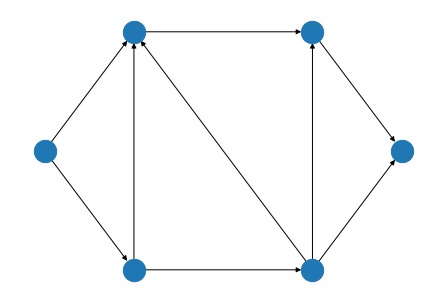

In [45]:
g = nx.DiGraph()

# nodes = ['s','a','b','c','d','t']
# g.add_nodes_from(nodes)

edges = [(1,2,2),(1,3,5),(2,4,1),(3,2,1),(3,5,3),(4,6,6),(5,2,1),(5,4,2),(5,6,1)]
g.add_weighted_edges_from(edges, 'cap')

pos = ((0,0),(0,10),(10,20),(10,0),(30,20),(30,0),(40,10))
nx.draw(g, pos, node_size=500)

Imagine the following situation: You solve the Project Selection using minimum cut, and you find not one but two distinct minimum cuts. You have a tie. There are two different combinations of projects you can perform that will lead to the same optimal objective value.






Remember that a cut is simply any set of nodes which includes the source node and excludes the sink node.

Show an example with a cut. Ask what the value of the cut is. Now take the same graph but a different cut. Ask what the value of the cut is. They are the same!

Draw the intersection of the cut (remember, the intersection of a cut is a set of nodes)

Let's see what we can say about the capacity of the intersection cut without actually calculating the capacity. You may assume that all capacities are positive.

Remember that the capacity of a cut is completely determined by the capacity of the edges coming out of the cut. 


What is the capacity of the intersection cut.

It is the same. There was a secret third tie!



Now take this same concept, but on a general graph. Imagine the situation with two distinct min cuts. 




In [38]:
recipes = {
    'Mashed potatoes': ['Potatoes', 'milk', 'butter'],
    'Roasted vegetables': ['Butternut squash', 'Carrots', 'Rosemary'],
    'Stuffing': ['Bread', 'Butter', 'Rosemary'],
    'Butternut squash soup': ['Butternut squash', 'Milk'],
    'Turkey (dish)': ['Turkey (ingredient)']
}

benefits = {
    'Mashed potatoes': 3,
    'Roasted vegetables': 6,
    'Stuffing': 2,
    'Butternut squash soup': 2,
    'Turkey (dish)': -100
}

costs = {
    'Potatoes': 4,
    'Milk': 2,
    'Butter': 1,
    'Butternut squash': 4,
    'Carrots': 3,
    'Rosemary': 2,
    'Bread': 1,
    'Turkey (ingredient)': 10,
}


dishes = list(benefits.keys())
ingredients = list(costs.keys())
                   
g = nx.DiGraph()

for ingredient in ingredients:
    g.add_node(ingredient)
    g.add_edge(ingredient, 't', capacity=costs[ingredient])

for dish in dishes:
    g.add_node(dish)
    g.add_edge('s', dish, capacity=benefits[dish])
    for ingredient in recipes[dish]:
        g.add_edge(dish, ingredient, capacity=float('inf'))

cut = nx.algorithms.flow.minimum_cut(g, 's', 't')[1][0]
cut

nx.cut_size(G=g, S=['Turkey (dish)', 'Turkey (ingredient)', 'butter', 'milk', 's'], weight='cap')

TypeError: 'NoneType' object is not iterable